In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib import rcParams

In [428]:
hydraulic_jump = pd.ExcelFile('hydraulic_jump_data.xlsx')  #Import data from Excel file

In [4]:
hydraulic_jump.sheet_names #Check the sheets names

['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4', 'Sheet5', 'Sheet6', 'Sheet7']

In [5]:
#Import all tables 
table1 = hydraulic_jump.parse('Sheet1', skiprows = 4)  #Experimental values expressing the relationship between Lr*/h1 and the Froude number for (h0 / h2 ) ≥ 1
table2 = hydraulic_jump.parse('Sheet2', skiprows = 4)  #Experimental values expressing the relationship between Lr * / h1 and the Froude number for h0 / h2<1
table3 = hydraulic_jump.parse('Sheet3', skiprows = 4)  #Experimental values used to plot the curves Y = f (Fr1) for (h0 / h2 ≥ 1) conjugated heights 
table4 = hydraulic_jump.parse('Sheet4', skiprows = 4)  #Experimental values used to plot the curves Y = f (Fr1) for  (h0 / h2<1) conjugate heights
table5 = hydraulic_jump.parse('Sheet5', skiprows = 4)  #Experimental values used to draw the curves y = f (X) for h0 / h2 ≥1
table6 = hydraulic_jump.parse('Sheet6', skiprows = 4)  #Experimental values used to draw the curves y = f (X) for h0 / h2 ˂ 1
table7 = hydraulic_jump.parse('Sheet7', skiprows = 4)  #classes

In [33]:
x1 = pd.concat([table1['Fr1'],table1['Fr1.1'],table1['Fr1.2'],table1['Fr1.3'],table1['Fr1.4'],table1['Fr1.5']])
y1 = pd.concat([table1['Lr*/h1'],table1['Lr*/h1.1'],table1['Lr*/h1.2'],table1['Lr*/h1.3'],table1['Lr*/h1.4'],table1['Lr*/h1.5']])
y_1 = pd.DataFrame(np.vstack((x1,y1))).T;

In [32]:
x2 = pd.concat([table2['Fr1'],table2['Fr1.1'],table2['Fr1.2'],table2['Fr1.3'],table2['Fr1.4'],table2['Fr1.5']])
y2 = pd.concat([table2['Lr*/h1'],table2['Lr*/h1.1'],table2['Lr*/h1.2'],table2['Lr*/h1.3'],table2['Lr*/h1.4'],table2['Lr*/h1.5']])
y_2 = pd.DataFrame(np.vstack((x2,y2))).T;

In [39]:
y_1 = y_1.drop(index=(71))

In [44]:
y_2 = y_2.drop(index=[57,58,59])

Text(0, 0.5, 'Lr*/h$_1$')

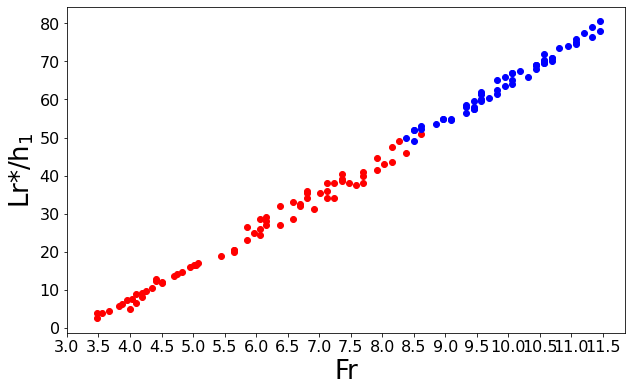

In [489]:
plt.figure(figsize=(10,6))  #plot Lr*/h1 against Froud number Fr

rcParams['font.family'] = 'sans-serif'


plt.plot(y_1[0], y_1[1], 'o', color='red')
plt.plot(y_2[0], y_2[1], 'o', color='blue')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#draw line

plt.xticks(np.arange(3,12, step=0.5))

plt.xlabel('Fr', fontsize=26)
plt.ylabel('Lr*/h$_1$', fontsize=26)

In [301]:

t3_1 = np.vstack([table3['Fr1'], table3['Y'], table3['δ']])
t3_2 = np.vstack([table3['Fr1.1'], table3['Y.1'], table3['δ.1']])

t4_1 = np.vstack([table4['Fr1'], table4['Y'], table4['δ']])
t4_2 = np.vstack([table4['Fr1.1'], table4['Y.1'], table4['δ.1']])

t3 = np.hstack([t3_1, t3_2])   #Fr|Y |Segma  ← (this is the new order)
t4 = np.hstack([t4_1, t4_2]) 

t3 = pd.DataFrame(t3).T    #Fr|Y |Segma    Experimental values used to plot the curves Y = f (Fr1) for (h0 / h2 ≥ 1) conjugated heights
t4 = pd.DataFrame(t4).T 

In [302]:
table_3 = t3
table_4 = t4.drop(t4.index[38:])   #drop rows (from row 38 to the last one)

Text(0, 0.5, 'Y')

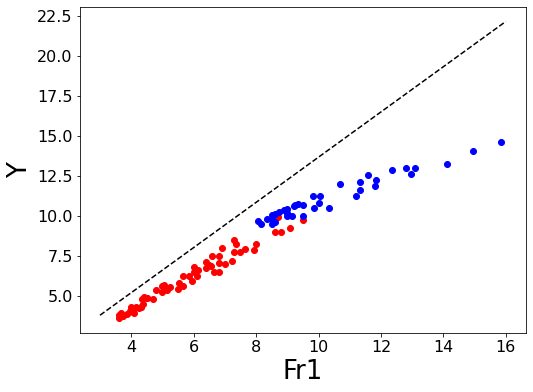

In [488]:
plt.figure(figsize=(8,6))  #plot Lr*/h1 against Froud number Fr
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

x = np.linspace(3,16,10)
#y = np.zeros((10))


y = (1/2)*(np.sqrt(1+8*x**2)-1)

plt.plot(x, y, color='black', linestyle='dashed')

plt.plot(table_3[0], table_3[1], 'o', color='red')
plt.plot(table_4[0], table_4[1], 'o', color='blue')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.hlines(9,0,15, color='black')
#plt.vlines(8,0,15, color='black')

#draw line

#plt.xticks(np.arange(3,12, step=0.5))

plt.xlabel('Fr1', fontsize=26)
plt.ylabel('Y', fontsize=26)

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

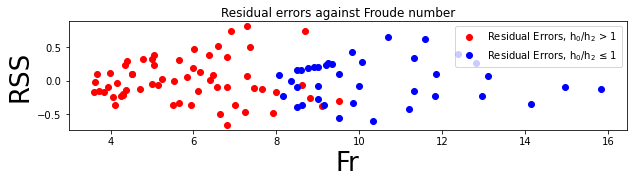

In [484]:
model_3 = 'table_3[1] ~ table_3[0]'   
model_4 = 'table_4[1] ~ table_4[0]' #for the first Froud number range (table_3) , dependent(table_3[1]), independent(table_3[0])
#Build and train the OLSR model: (ols regression)

olsr_3 = smf.ols(model_3, table_3).fit()
olsr_4 = smf.ols(model_4, table_4).fit()
#Plot the residual errors (stored in the olsr_results.resid field) against the Time_Period:

#Create a new pyplot figure to plot into
fig = plt.figure(figsize=(10,2))
 

fig.suptitle('Residual errors against Froude number')  #the title of the figure
plt.xlabel('Fr', fontsize=26) #x axis label 
plt.plot(table_3[0], olsr_3.resid, 'ro', label='Residual Errors, h${_0}$/h${_2}$ > 1') #the plot 
plt.plot(table_4[0], olsr_4.resid, 'bo', label='Residual Errors, h${_0}$/h${_2}$ ≤ 1')
 
plt.ylabel('RSS', fontsize=26)  #y axis label

#Set up the legend. There is only one time series in the legend.
plt.legend()
 
#Show the plot
plt.show()

In [72]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip

In [78]:
y, X = dmatrices(model_3, table_3, return_type='dataframe')

keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(olsr_3.resid, X)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 10.216708600077801),
 ("LM test's p-value:", 0.00604602468336516),
 ('F-statistic:', 5.84887392766225),
 ("F-test's p-value:", 0.004892965421750033)]

In [79]:
y, X = dmatrices(model_4, table_4, return_type='dataframe')

keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(olsr_4.resid, X)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 6.449108798539321),
 ("LM test's p-value:", 0.03977350072906743),
 ('F-statistic:', 3.5770591471981357),
 ("F-test's p-value:", 0.03859140608282162)]

Text(0.5, 1.0, 'Fr1 (Froude number) against Y (conjugate height)')

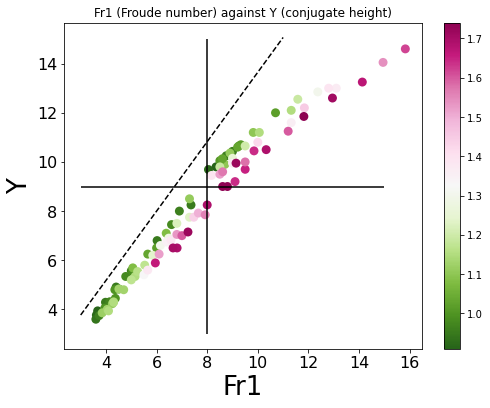

In [487]:
fig = plt.figure(figsize=(8,6))
plt.scatter(table_3[0], table_3[1],  marker='o', edgecolors='none',s=80,c=table_3[2], cmap='PiYG_r')
plt.scatter(table_4[0], table_4[1],edgecolors='none',s=80,c=table_4[2], cmap='PiYG_r')

plt.hlines(9,3,15, color='black')
plt.vlines(8,3,15, color='black')

x = np.linspace(3,11,10)
#y = np.zeros((10))


y = (1/2)*(np.sqrt(1+8*x**2)-1)

plt.plot(x, y, color='black', linestyle='dashed')

plt.xlabel('Fr1', fontsize=26)
plt.ylabel('Y', fontsize=26)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.colorbar()
plt.title('Fr1 (Froude number) against Y (conjugate height)')

### Use intervals instead of individual values

In [278]:
#count the number of rwos within the intervals 0.91–1.11 (1.01) 	1.12–1.32 (1.22) 	1.33–1.53 (1.43) 	1.54–1.74 (1.64) for minor channel 
tab3 = table_3
c1 = 0; c2 = 0; c3 = 0; c4 = 0 
for i in range(0, len(tab3)):
    if (0.91 <= tab3[2][i] <= 1.11):
        c1 = c1 + 1
    elif (1.12 <= tab3[2][i] <= 1.32):
        c2 = c2 + 1
    elif (1.33 <= tab3[2][i] <= 1.53):
        c3 = c3 +1
    elif (1.54 <= tab3[2][i] <= 1.74):
        c4 = c4 +1


#count the number of rwos within the intervals 0.91–1.11 (1.01) 	1.12–1.32 (1.22) 	1.33–1.53 (1.43) 	1.54–1.74 (1.64) for major channel
tab4 = table_4
c5 = 0; c6 = 0; c7 = 0; c8 = 0 
for i in range(0, len(tab4)):
    if (0.91 <= tab4[2][i] <= 1.11):
        c5 = c5 + 1
    elif (1.12 <= tab4[2][i] <= 1.32):
        c6 = c6 + 1
    elif (1.33 <= tab4[2][i] <= 1.53):
        c7 = c7 +1
    elif (1.54 <= tab4[2][i] <= 1.74):
        c8 = c8 +1
    

In [280]:
#Create tables depending on the third column, the interval 0.91–1.11 (1.01) 	1.12–1.32 (1.22) 	1.33–1.53 (1.43) 	1.54–1.74 (1.64) for minor channel
tab3 = table_3

f1 = np.zeros((c1,2))   #index,columns
f2 = np.zeros((c2,2))
f3 = np.zeros((c3,2))
f4 = np.zeros((c4,2))

for i in range(0, len(tab3)):
    if (0.91 <= tab3[2][i] <= 1.11):
        f1[i][0] = tab3[0][i]
        f1[i][1] = tab3[1][i]

    elif (1.12 <= tab3[2][i] <= 1.32):
        j = i - c1 
        f2[j][0] = tab3[0][i]
        f2[j][1] = tab3[1][i]

    elif (1.33 <= tab3[2][i] <= 1.53):
        j = i - c1 - c2 
        f3[j][0] = tab3[0][i]
        f3[j][1] = tab3[1][i]

    elif (1.54 <= tab3[2][i] <= 1.74):
        j = i - c1  - c3 - c2
        f4[j][0] = tab3[0][i]   #index, column =column, index
        f4[j][1] = tab3[1][i]
    
    

#Create tables depending on the third column, the interval 0.91–1.11 (1.01) 	1.12–1.32 (1.22) 	1.33–1.53 (1.43) 	1.54–1.74 (1.64) for major channel
tab4 = table_4

f5 = np.zeros((c5,2))   #index,columns
f6 = np.zeros((c6,2))
f7 = np.zeros((c7,2))
f8 = np.zeros((c8,2))

for i in range(0, len(tab4)):
    if (0.91 <= tab4[2][i] <= 1.11):
        f5[i][0] = tab4[0][i]
        f5[i][1] = tab4[1][i]

    elif (1.12 <= tab4[2][i] <= 1.32):
        j = i - c5 
        f6[j][0] = tab4[0][i]
        f6[j][1] = tab4[1][i]

    elif (1.33 <= tab4[2][i] <= 1.53):
        j = i - c5 - c6 
        f7[j][0] = tab4[0][i]
        f7[j][1] = tab4[1][i]

    elif (1.54 <= tab4[2][i] <= 1.74):
        j = i - c5  - c7 - c6
        f8[j][0] = tab4[0][i]
        f8[j][1] = tab4[1][i]  


In [281]:
f1 = pd.DataFrame(f1); f2 = pd.DataFrame(f2); f3 = pd.DataFrame(f3); f4 = pd.DataFrame(f4)
f5 = pd.DataFrame(f5); f6 = pd.DataFrame(f6); f7 = pd.DataFrame(f7); f8 = pd.DataFrame(f8)

In [325]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept=True)
model1.fit(f1[0][:, np.newaxis], f1[1])   #all observed amplitudes
xfit1 = np.linspace(0, 2, 200)
yfit1 = model1.predict(xfit1[:, np.newaxis])

c1 = np.polyfit(xfit1,yfit1,1)

model2 = LinearRegression(fit_intercept=True)
model2.fit(f2[0][:, np.newaxis], f2[1])   #all observed amplitudes
xfit2 = np.linspace(0, 2, 200)
yfit2 = model2.predict(xfit2[:, np.newaxis])

c2 = np.polyfit(xfit2,yfit2,1)

model3 = LinearRegression(fit_intercept=True)
model3.fit(f3[0][:, np.newaxis], f3[1])   #all observed amplitudes
xfit3 = np.linspace(0, 2, 200)
yfit3 = model3.predict(xfit3[:, np.newaxis])

c3 = np.polyfit(xfit3,yfit3,1)

model4 = LinearRegression(fit_intercept=True)
model4.fit(f4[0][:, np.newaxis], f4[1])   #all observed amplitudes
xfit4 = np.linspace(0, 2, 200)
yfit4 = model4.predict(xfit4[:, np.newaxis])

c4 = np.polyfit(xfit4,yfit4,1)

c1; c2; c3; c4


#-------------------------..............-----------------..............----------------.................----------------
#-----------------------------------------------------------------------------------------------------------------------

model5 = LinearRegression(fit_intercept=True)
model5.fit(f5[0][:, np.newaxis], f5[1])   #all observed amplitudes
xfit5 = np.linspace(0, 2, 200)
yfit5 = model5.predict(xfit5[:, np.newaxis])

c5 = np.polyfit(xfit5,yfit5,1)

model6 = LinearRegression(fit_intercept=True)
model6.fit(f6[0][:, np.newaxis], f6[1])   #all observed amplitudes
xfit6 = np.linspace(0, 2, 200)
yfit6 = model6.predict(xfit6[:, np.newaxis])

c6 = np.polyfit(xfit6,yfit6,1)

model7 = LinearRegression(fit_intercept=True)
model7.fit(f7[0][:, np.newaxis], f7[1])   #all observed amplitudes
xfit7 = np.linspace(0, 2, 200)
yfit7 = model7.predict(xfit7[:, np.newaxis])

c7 = np.polyfit(xfit7,yfit7,1)

model8 = LinearRegression(fit_intercept=True)
model8.fit(f8[0][:, np.newaxis], f8[1])   #all observed amplitudes
xfit8 = np.linspace(0, 2, 200)
yfit8 = model8.predict(xfit8[:, np.newaxis])

c8 = np.polyfit(xfit8,yfit8,1)

c5; c6; c7; c8


/tmp/ipykernel_20173/1874808997.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model1.fit(f1[0][:, np.newaxis], f1[1])   #all observed amplitudes
/tmp/ipykernel_20173/1874808997.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model2.fit(f2[0][:, np.newaxis], f2[1])   #all observed amplitudes
/tmp/ipykernel_20173/1874808997.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model3.fit(f3[0][:, np.newaxis], f3[1])   #all observed amplitudes
/tmp/ipykernel_20173/1874808997.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated an

array([0.70468177, 3.42566199])

In [326]:
coe1 = pd.DataFrame([(1.01,c1[0],c1[1]),   
            (1.22, c2[0],c2[1]),
            (1.43, c3[0],c3[1]),
            (1.64, c4[0],c4[1])])

coe2 = pd.DataFrame([(1.01,c5[0],c5[1]),   
            (1.22, c6[0],c6[1]),
            (1.43, c7[0],c7[1]),
            (1.64, c8[0],c8[1])])

In [327]:
#ax+b || a and b as a function of compatness ratio (1.01 1.22 1.43 1.64) for minor channel

model1a = LinearRegression(fit_intercept=True)
model1a.fit(coe1[0][:, np.newaxis], coe1[1])   #minor channel
xfit1a = np.linspace(0, 2, 200)
yfit1a = model1a.predict(xfit1a[:, np.newaxis])

a1c = np.polyfit(xfit1a,yfit1a,1)

model1b = LinearRegression(fit_intercept=True)
model1b.fit(coe1[0][:, np.newaxis],coe1[2])   #major channel
xfit1b = np.linspace(0, 2, 200)
yfit1b = model1b.predict(xfit1b[:, np.newaxis])

b1c = np.polyfit(xfit1b,yfit1b,1)
#             __________________________________________
#-------------__________________________________________---------------------------------
#ax+b || a and b as a function of compatness ratio (1.01 1.22 1.43 1.64) for major channel

model2a = LinearRegression(fit_intercept=True)
model2a.fit(coe2[0][:, np.newaxis], coe2[1])   #all observed amplitudes
xfit2a = np.linspace(0, 2, 200)
yfit2a = model2a.predict(xfit2a[:, np.newaxis])

a2c = np.polyfit(xfit2a,yfit2a,1)

model2b = LinearRegression(fit_intercept=True)
model2b.fit(coe2[0][:, np.newaxis],coe2[2])   #all observed amplitudes
xfit2b = np.linspace(0, 2, 200)
yfit2b = model2b.predict(xfit2b[:, np.newaxis])

b2c = np.polyfit(xfit2b,yfit2b,1)

/tmp/ipykernel_20173/2068093669.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model1a.fit(coe1[0][:, np.newaxis], coe1[1])   #minor channel
/tmp/ipykernel_20173/2068093669.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model1b.fit(coe1[0][:, np.newaxis],coe1[2])   #major channel
/tmp/ipykernel_20173/2068093669.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model2a.fit(coe2[0][:, np.newaxis], coe2[1])   #all observed amplitudes
/tmp/ipykernel_20173/2068093669.py:28: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will

In [292]:
a2c

array([-0.28817926,  1.17512417])

In [333]:
coe1

,0,1,2
0,1.01,1.242477,-0.756770
1,1.22,1.192664,-0.782049
2,1.43,1.162086,-0.881398
3,1.64,1.129389,-0.964827


In [347]:
#count the number of rwos within the intervals 0.91–1.11 (1.01) 	1.12–1.32 (1.22) 	1.33–1.53 (1.43) 	1.54–1.74 (1.64) for minor channel 
tab3 = table_3
tab4 = table_4
tab4 

,0,1,2
0,8.35,9.80,0.91
1,8.05,9.69,0.92
2,8.75,10.25,0.96
3,9.00,10.43,0.96
4,9.25,10.65,1.01
5,8.50,10.05,1.01
6,10.70,12.00,1.02
7,9.33,10.70,1.02
8,8.60,10.13,1.03
9,9.20,10.60,1.03


In [378]:
a1 = a1c[0]
b1 = a1c[1]
a2 = b1c[0]
b2 = b1c[1]


tab3[3] = (a1 * tab3[2] + b1) * tab3[0] + (a2 * tab3[2] + b2) #'y_emp'

In [377]:
a1 = a2c[0]
b1 = a2c[1]
a2 = b2c[0]
b2 = b2c[1]


tab4[3] = (a1 * tab4[2] + b1) * tab4[0] + (a2 * tab4[2] + b2)  #'y_emp'

In [348]:
x = 0.91
fr = 8.35
a1 = a1c[0]
b1 = a1c[1]
a2 = b1c[0]
b2 = b1c[1]

ee1 = (a1 * x + b1) * fr + (a2 * x + b2)
#----------------------------------------------------------
a1 = a2c[0]
b1 = a2c[1]
a2 = b2c[0]
b2 = b2c[1]

ee2 = (a1 * x + b1) * fr + (a2 * x + b2)

(3.0, 15.0)

findfont: Font family ['Century'] not found. Falling back to DejaVu Sans.


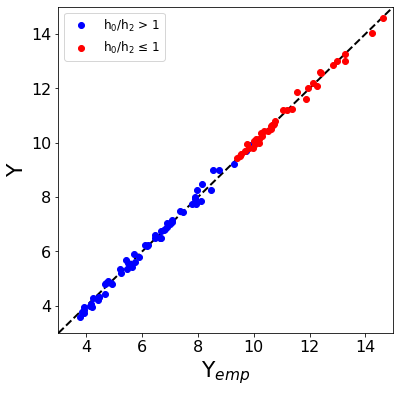

In [480]:
plt.figure(figsize=(6,6))

y = np.linspace(3,15,2)
x = y
plt.plot(x, y,'--', color = 'black', linewidth=2)

plt.plot(tab3['y_emp'], tab3[1],'o',color='blue', label = 'h${_0}$/h${_2}$ > 1')
plt.plot(tab4['y_emp'], tab4[1],'o',color='red', label = 'h${_0}$/h${_2}$ ≤ 1')



plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('Y$_{emp}$',fontname='Century',fontsize=22, color='black')
plt.ylabel('Y',fontname='Century', fontsize=22, color='black')
plt.legend(fontsize=12, loc='upper left')
plt.xlim(3, 15)
plt.ylim(3, 15)

In [402]:
coe_r3 = np.corrcoef(tab3['y_emp'], tab3[1])
coer3 = coe_r3**2

In [403]:
coe_r4 = np.corrcoef(tab4['y_emp'], tab4[1])
coer4 = coe_r4**2

In [411]:
print(coer3[1,0], coer4[1,0])

0.9923399793801595 0.991588451695881


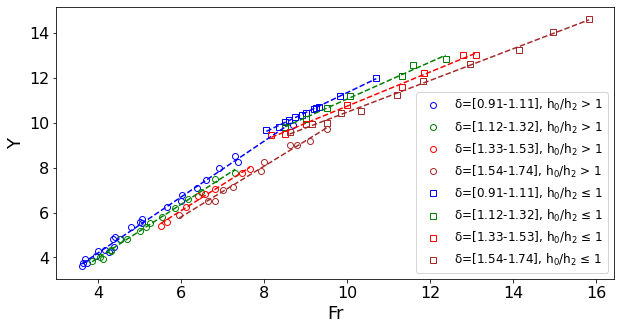

In [490]:
# plot all data and their fits (I aleady put them in sparated tables)

plt.figure(figsize = (10,5));

plt.plot(f1[0],f1[1], 'o', color = 'blue', mfc='none', label = 'δ=[0.91-1.11], h${_0}$/h${_2}$ > 1')
plt.plot(f2[0],f2[1], 'o', color = 'green', mfc='none', label = 'δ=[1.12-1.32], h${_0}$/h${_2}$ > 1')
plt.plot(f3[0],f3[1], 'o', color = 'red', mfc='none', label = 'δ=[1.33-1.53], h${_0}$/h${_2}$ > 1')
plt.plot(f4[0],f4[1], 'o', color = 'brown', mfc='none', label = 'δ=[1.54-1.74], h${_0}$/h${_2}$ > 1')

plt.plot(f5[0],f5[1], 's', color = 'blue', mfc='none', label = 'δ=[0.91-1.11], h${_0}$/h${_2}$ ≤ 1')
plt.plot(f6[0],f6[1], 's', color = 'green', mfc='none', label = 'δ=[1.12-1.32], h${_0}$/h${_2}$ ≤ 1')
plt.plot(f7[0],f7[1], 's', color = 'red', mfc='none', label = 'δ=[1.33-1.53], h${_0}$/h${_2}$ ≤ 1')
plt.plot(f8[0],f8[1], 's', color = 'brown', mfc='none', label = 'δ=[1.54-1.74], h${_0}$/h${_2}$ ≤ 1')

x1 = np.linspace(f1[0].min(), f1[0].max(), 2); x2 = np.linspace(f2[0].min(), f2[0].max(), 2); 
x3 = np.linspace(f3[0].min(), f3[0].max(), 2); x4 = np.linspace(f4[0].min(), f4[0].max(), 2)
y1 = c1[0] * x1 + c1[1];  y2 = c2[0] * x2 + c2[1];  y3 = c3[0] * x3 + c3[1];  y4 = c4[0] * x4 + c4[1]
plt.plot(x1,y1, '--', color = 'blue', mfc='none'); plt.plot(x2,y2, '--', color = 'green', mfc='none');
plt.plot(x3,y3, '--', color = 'red', mfc='none'); plt.plot(x4,y4, '--', color = 'brown', mfc='none');
#------------------------------------------------

x5 = np.linspace(f5[0].min(), f5[0].max(), 2); x6 = np.linspace(f6[0].min(), f6[0].max(), 2); 
x7 = np.linspace(f7[0].min(), f7[0].max(), 2); x8 = np.linspace(f8[0].min(), f8[0].max(), 2)
y5 = c5[0] * x5 + c5[1];  y6 = c6[0] * x6 + c6[1];  y7 = c7[0] * x7 + c7[1];  y8 = c8[0] * x8 + c8[1]
plt.plot(x5,y5, '--', color = 'blue', mfc='none'); plt.plot(x6,y6, '--', color = 'green', mfc='none');
plt.plot(x7,y7, '--', color = 'red', mfc='none'); plt.plot(x8,y8, '--', color = 'brown', mfc='none');


plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
plt.xlabel('Fr',fontname='Century',fontsize=18, color='black')
plt.ylabel('Y',fontname='Century', fontsize=18, color='black')
plt.legend(fontsize=12, loc='lower right')